In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# Combine the data
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the combined data
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mousecount = merged_df["Mouse ID"].nunique()
mousecount

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)].sort_values(by=['Mouse ID', 'Timepoint'])
duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data_df = merged_df.loc[merged_df['Mouse ID'] != duplicate_mice[0]]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking clean mice in DateFrame
num_mice_clean = clean_data_df["Mouse ID"].nunique()
num_mice_clean

248

In [12]:
# Group the data by regimen
regimen_grouped = merged_df.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

# Create a summary table for the tumor volume by regimen
summary_df = pd.DataFrame({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Tumor Volume Variance": regimen_variance,
    "Tumor Volume Std. Dev.": regimen_std,
    "Tumor Volume Std. Err.": regimen_sem
})

# Display the summary statistics table
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Using the aggregation method, produce the same summary statistics in a single line.
sum_df = merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
# Count the number of unique Mouse IDs for each Drug Regimen
mice_regimen = clean_data_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
mice_regimen


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

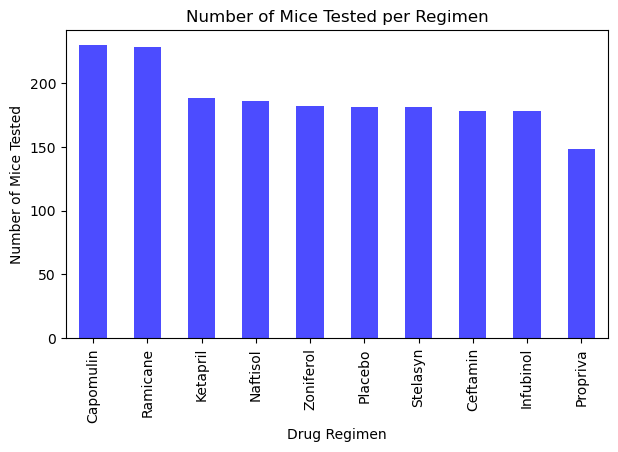

In [15]:
# Create Bar plot from Data
mice_regimen.plot(kind="bar", color="b", alpha=0.7, align="center", figsize=(7,4))
# Creating labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Regimen")
# Display plot
plt.show()

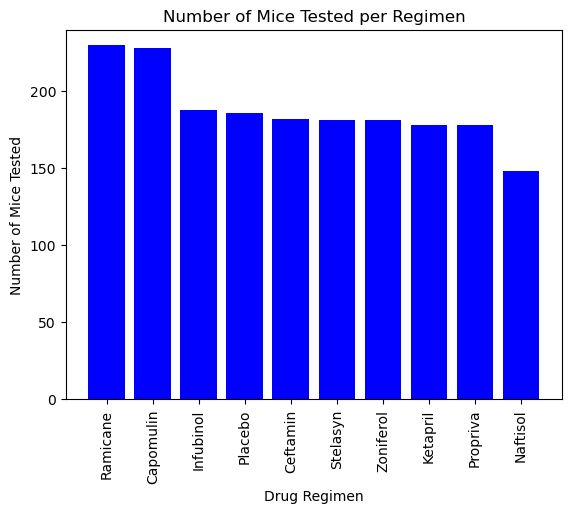

In [16]:
# Define x-axis and y-axis
drug_regimens = clean_data_df["Drug Regimen"].unique()
mice_count = clean_data_df["Drug Regimen"].value_counts()

# Create bar chart using pyplot
plt.bar(drug_regimens, mice_count, color="b")

# Creating labels
plt.xticks(rotation=90)
plt.ylim(0, max(mice_count)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Regimen")

# Display plot
plt.show()

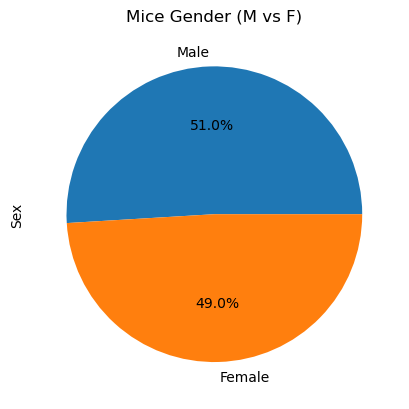

In [17]:
# finding the distribution of female and male mice
gender_count = clean_data_df['Sex'].value_counts()

# Create a pie plot
gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Mice Gender (M vs F)")

# Display the plot
plt.show()

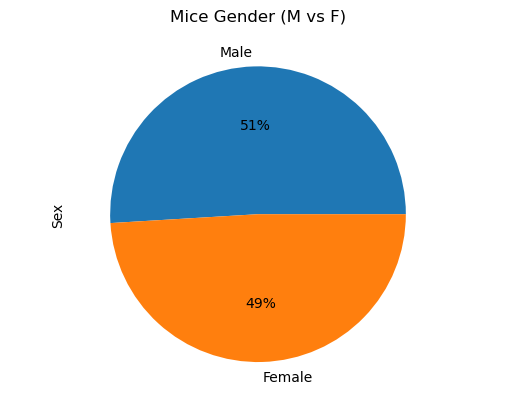

In [18]:
# finding the distribution of female and male mice
gender_counts = clean_data_df["Sex"].value_counts()

# Creating labels
labels = ["Male", "Female"]
plt.axis("equal")
plt.ylabel("Sex", labelpad=-40)
plt.title("Mice Gender (M vs F)")

# Create a pie chart with pyplot
plt.pie(gender_counts, labels=labels, autopct="%1.0f%%")
plt.show()

In [19]:
# Use loc to filter the merged data by the treatment
capomulin_data = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
ramicane_data = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
infubinol_data = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
ceftamin_data = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
capomulin_last_tp = capomulin_data.groupby("Mouse ID")["Timepoint"].max()
ramicane_last_tp = ramicane_data.groupby("Mouse ID")["Timepoint"].max()
infubinol_last_tp = infubinol_data.groupby("Mouse ID")["Timepoint"].max()
ceftamin_last_tp = ceftamin_data.groupby("Mouse ID")["Timepoint"].max()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
capomulin_final = pd.merge(capomulin_last_tp, merged_df, on=["Mouse ID", "Timepoint"])
ramicane_final = pd.merge(ramicane_last_tp, merged_df, on=["Mouse ID", "Timepoint"])
infubinol_final = pd.merge(infubinol_last_tp, merged_df, on=["Mouse ID", "Timepoint"])
ceftamin_final = pd.merge(ceftamin_last_tp, merged_df, on=["Mouse ID", "Timepoint"])

# Results
capomulin_final.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
# Results
ramicane_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [21]:
# Results
infubinol_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [22]:
# Results
ceftamin_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
# Put treatments into a list for for loop
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Use a for loop to iterate through the treatments list
for treatment in treatment_regimen:
    # Filter the merged data by the treatment
    treatment_data = merged_df.loc[merged_df["Drug Regimen"] == treatment]
    
    # Get the last (greatest) timepoint for each mouse
    last_tp = treatment_data.groupby("Mouse ID")["Timepoint"].max()
    
    # Merge with the original DataFrame to get the tumor volume at the last timepoint
    final_tumor_volumes = pd.merge(last_tp, merged_df, on=["Mouse ID", "Timepoint"])
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(final_tumor_volumes["Tumor Volume (mm3)"])


In [24]:
# Calculate the IQR and determine if there are any potential outliers.  
for i in range(len(treatment_regimen)):
    quartiles = tumor_vol_data[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    print(f"---{treatment_regimen[i]}---")
    print(f"Lower Quartile: {round(lowerq, 2)}")
    print(f"Upper Quartile: {round(upperq, 2)}")
    print(f"Interquartile Range: {round(iqr, 2)}")
    print(f"Median: {round(quartiles[0.5], 2)}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if len(outliers) > 0:
        print(f"Potential Outlier Found: {outliers.values}\n")
    else:
        print("No Potential Outliers Found\n")

---Capomulin---
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile Range: 7.78
Median: 38.13
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No Potential Outliers Found

---Ramicane---
Lower Quartile: 31.56
Upper Quartile: 40.66
Interquartile Range: 9.1
Median: 36.56
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No Potential Outliers Found

---Infubinol---
Lower Quartile: 54.05
Upper Quartile: 65.53
Interquartile Range: 11.48
Median: 60.17
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Potential Outlier Found: [36.3213458]

---Ceftamin---
Lower Quartile: 48.72
Upper Quartile: 64.3
Interquartile Range: 15.58
Median: 59.85
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No Potential Outliers Found



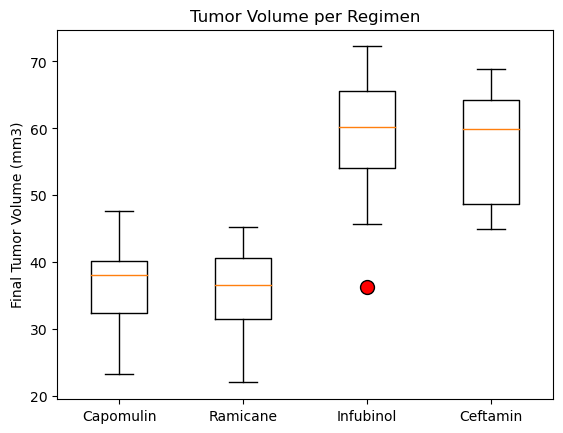

In [25]:
# Create a boxplot
plt.boxplot(tumor_vol_data, labels=treatment_regimen,flierprops=dict(markerfacecolor='red',markersize=10))

# Set labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Tumor Volume per Regimen")

# Display the plot
plt.show()

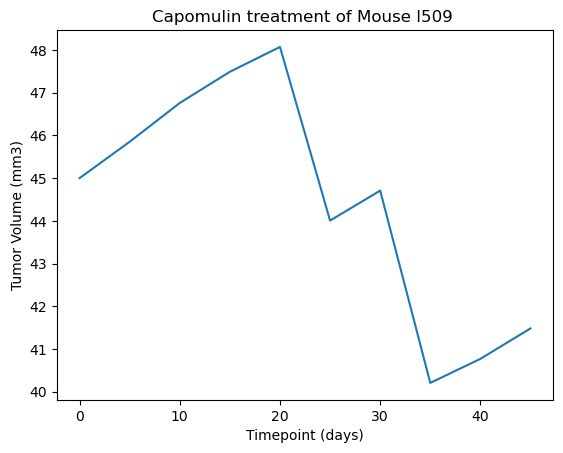

In [26]:
# Filting the data
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]

# Setting mouse ID
mouse_id = "l509"

# Creating new DataFrame
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id][["Timepoint", "Tumor Volume (mm3)"]]

# Create line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of Mouse {mouse_id} ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


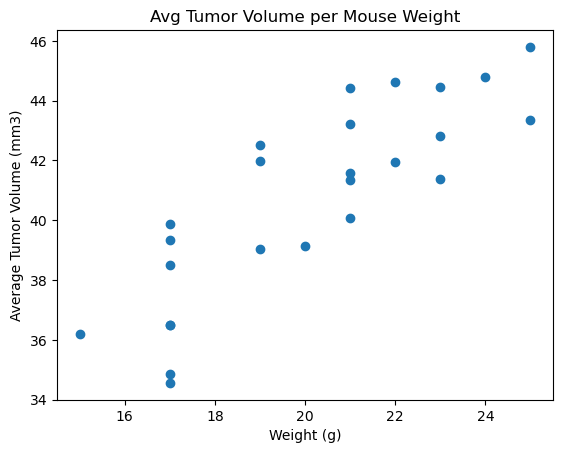

In [27]:
# Filting the data
capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

# Group the data
grouped_capomulin = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)[['Weight (g)', 'Tumor Volume (mm3)']]

# Create a scatter plot
plt.scatter(grouped_capomulin['Weight (g)'], grouped_capomulin['Tumor Volume (mm3)'])

# Add axis labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Avg Tumor Volume per Mouse Weight")

# Show the plot
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


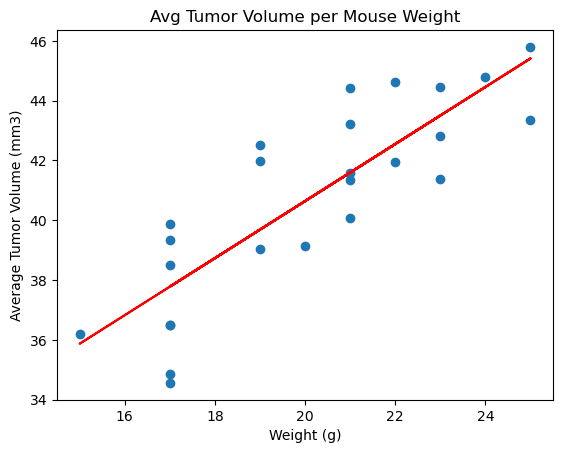

In [28]:
# Filting the data
capomulin_data = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation between the variables
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)

# Print the correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression model between mouse weight and average tumor volume
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept

# Plot the scatter plot and linear regression model
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regress_values, color="red")
plt.title("Avg Tumor Volume per Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()